<a href="https://colab.research.google.com/github/LolaSM/neck-pain/blob/main/comparison_performance_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preparation of Data

In [18]:
url ='https://raw.githubusercontent.com/LolaSM/neck-pain/refs/heads/main/speed_acceleration/tablaVectores_AB_speed_acceleration.csv'
patients_features = pd.read_csv(url)

Each group (A:pain-free (0), B:pain-affected (1)) will be represented by an integer

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
patients_features['group'] = le.fit_transform(patients_features['group'])

# Separate features / target
X = patients_features.drop(columns=['patient', 'group'])   # 87 × N_features
y = patients_features['group']                             # 87 labels (0/1)

print(f'Dataset shape: {X.shape}  (patients × features)')

Dataset shape: (87, 24)  (patients × features)


## Exploratory Data Analysis

In [20]:
print(patients_features.info())
print(patients_features['group'].value_counts())
print(patients_features.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    87 non-null     int64  
 1   group      87 non-null     int64  
 2   mediaVelX  87 non-null     float64
 3   mediaVelY  87 non-null     float64
 4   mediaVelZ  87 non-null     float64
 5   mediaAccX  87 non-null     float64
 6   mediaAccY  87 non-null     float64
 7   mediaAccZ  87 non-null     float64
 8   stdVelX    87 non-null     float64
 9   stdVelY    87 non-null     float64
 10  stdVelZ    87 non-null     float64
 11  stdAccX    87 non-null     float64
 12  stdAccY    87 non-null     float64
 13  stdAccZ    87 non-null     float64
 14  kurVelX    87 non-null     float64
 15  kurVelY    87 non-null     float64
 16  kurVelZ    87 non-null     float64
 17  kurAccX    87 non-null     float64
 18  kurAccY    87 non-null     float64
 19  kurAccZ    87 non-null     float64
 20  skwVelX    8

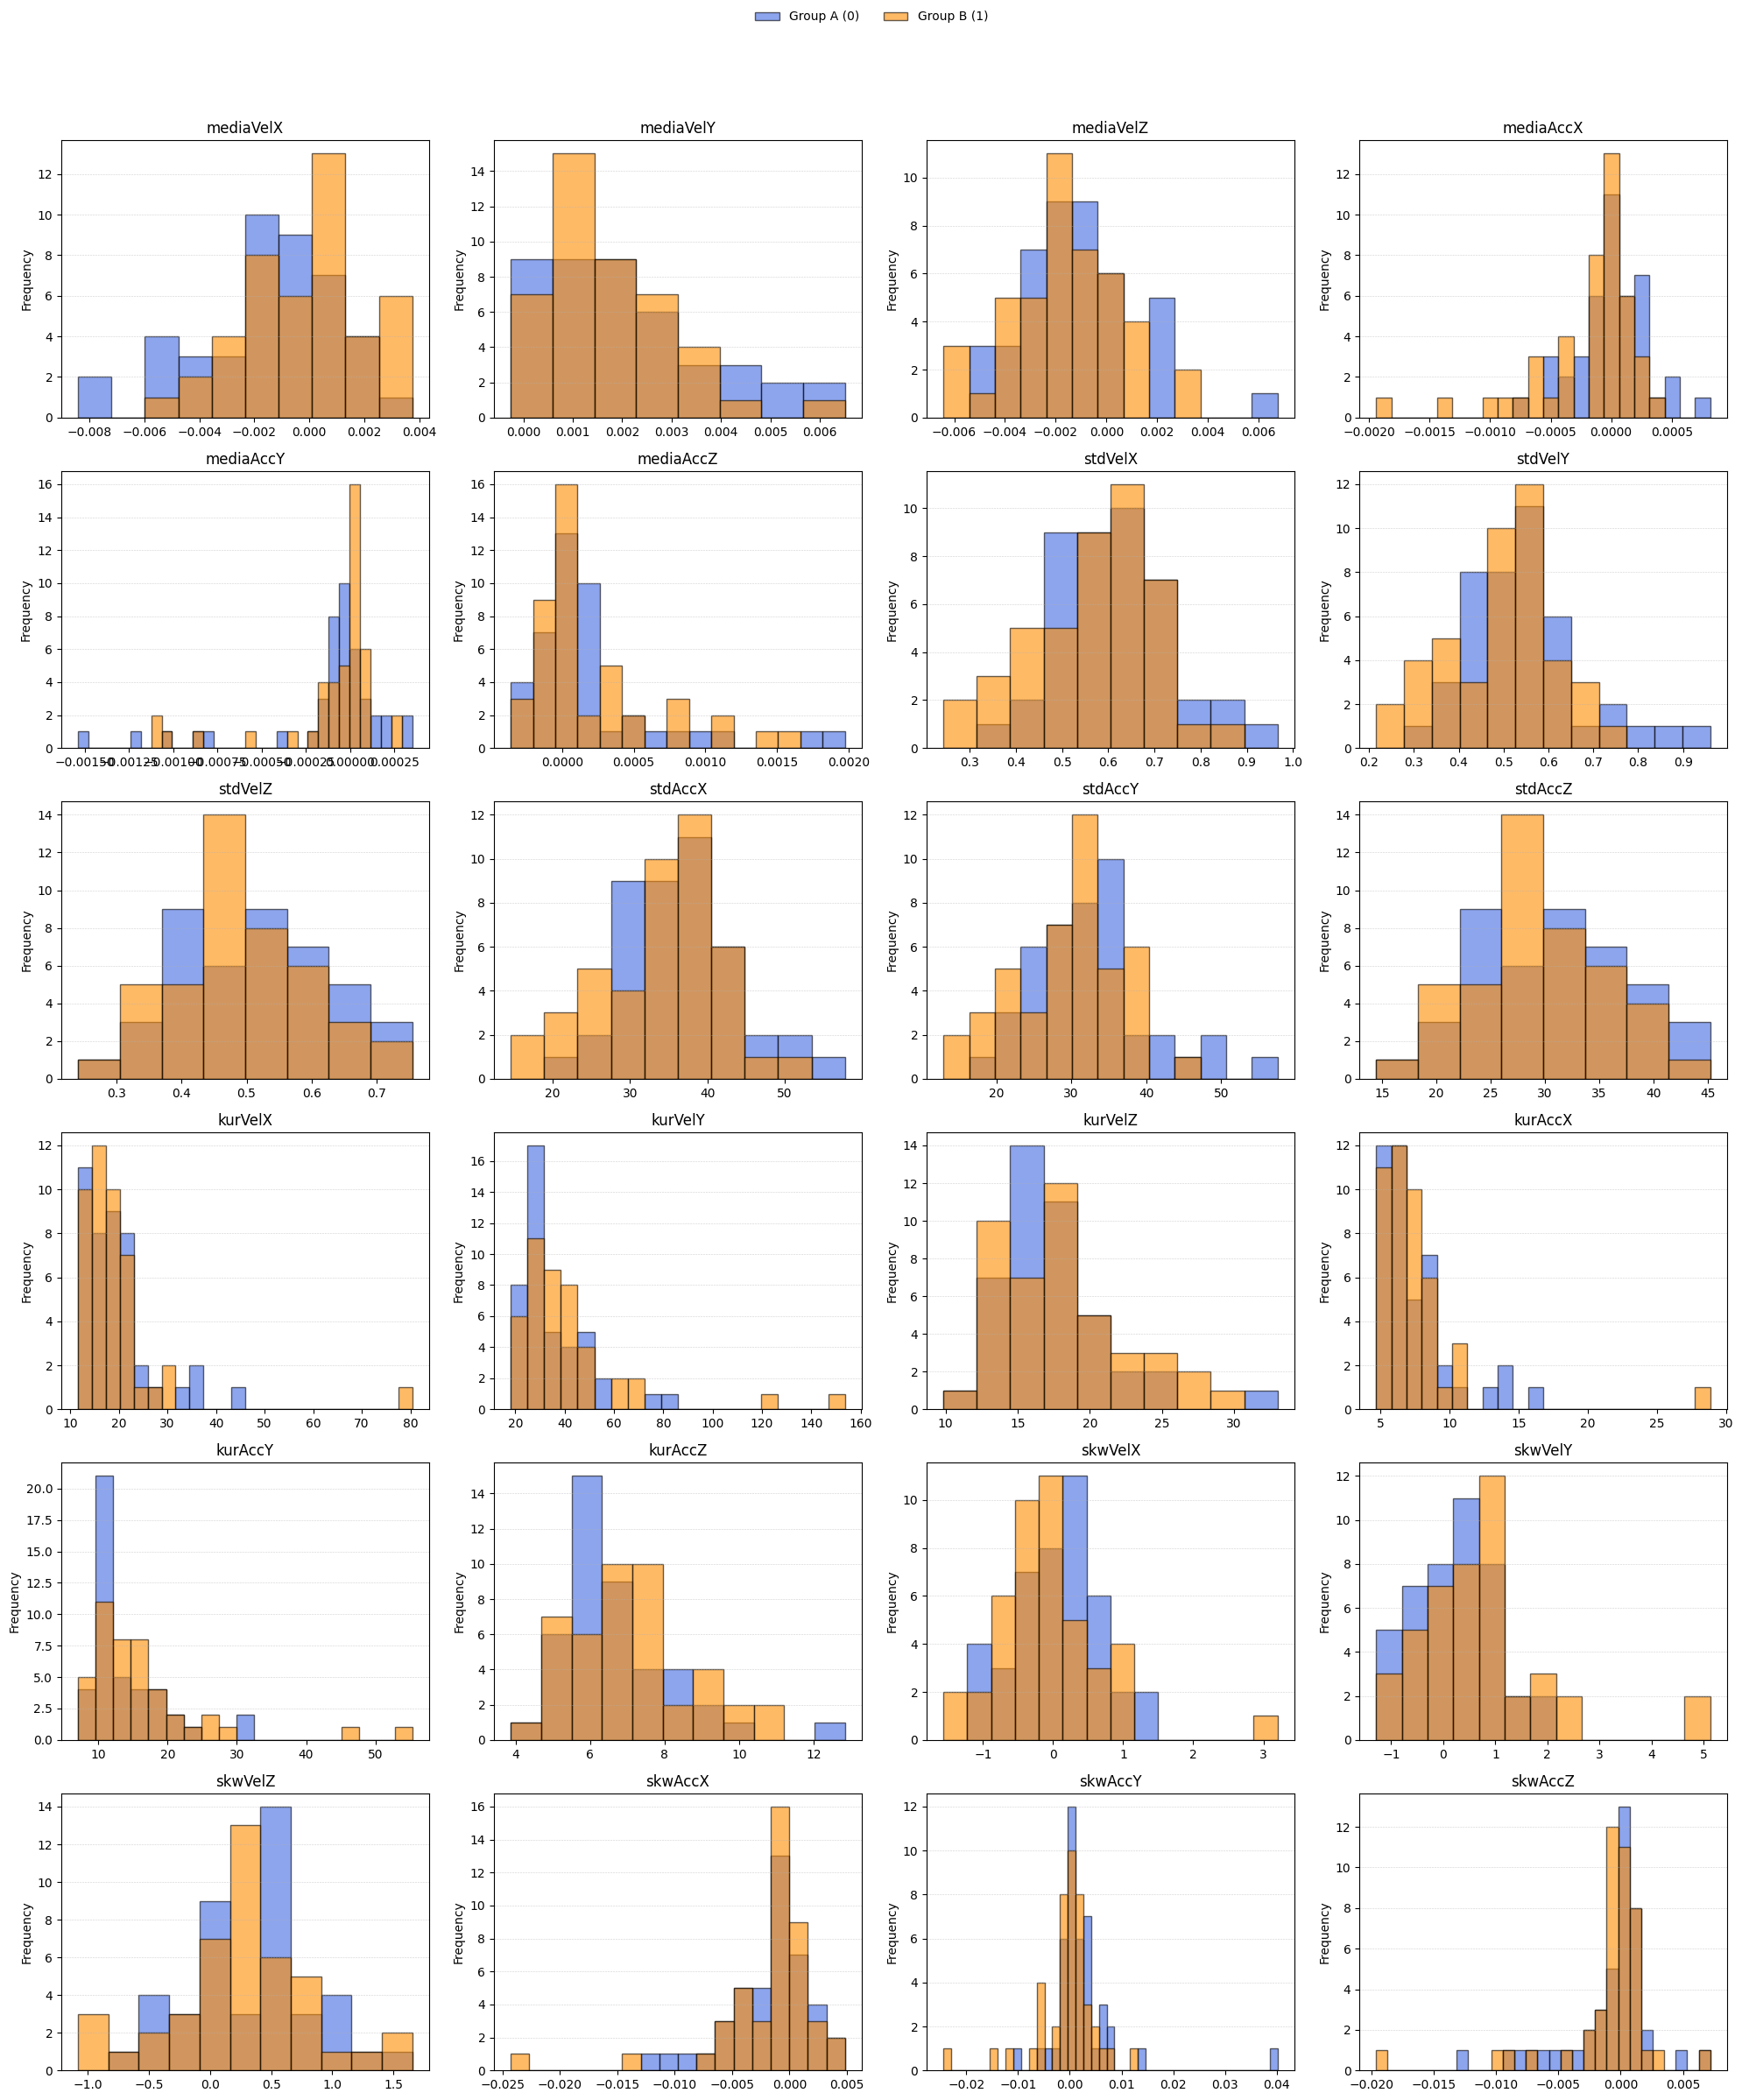

In [21]:
#DISTRIBUTION OF FEATURES ACCORDING TO THE GROUP

grupo_a = patients_features[patients_features["group"] == 0]
grupo_b = patients_features[patients_features["group"] == 1]
features = patients_features.drop(columns=["patient", "group"]).columns

# --- Sub-plot grid -------------------------------------------------------
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]

    # 1) Build one common set of edges from both groups -------------------
    combined = pd.concat([grupo_a[feat], grupo_b[feat]]).dropna()
    edges = np.histogram_bin_edges(combined, bins="fd")   # Freedman-Diaconis

    # 2) Draw histograms with raw counts (density=False) ------------------
    ax.hist(grupo_a[feat].dropna(), bins=edges,
            alpha=0.6, label="Group A (0)",
            color="royalblue", edgecolor="black")
    ax.hist(grupo_b[feat].dropna(), bins=edges,
            alpha=0.6, label="Group B (1)",
            color="darkorange", edgecolor="black")

    ax.set_title(feat)
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", ls="--", lw=0.4, alpha=0.6)

# remove empty sub-plots if grid is larger than features -----------------
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Evaluation of normality of the features

In [6]:
# TEST SHAPIRO-WILK FROM GROUPS
import pandas as pd
from scipy.stats import shapiro

resultados = []

for feat in features:
    for etiqueta, datos in zip(["A", "B"], [grupo_a, grupo_b]):
        W, p = shapiro(datos[feat])
        resultados.append(
            {"feature": feat,
             "grupo": etiqueta,
             "W": W,
             "p_value": p,
             "normal?": p > 0.05})

# --- 3.  Revisa los resultados cómodamente ------------------------
res_df = pd.DataFrame(resultados)
res_df


,feature,grupo,W,p_value,normal?
0,mediaVelX,A,0.954847,8.970674e-02,True
1,mediaVelX,B,0.981495,6.934905e-01,True
2,mediaVelY,A,0.907949,2.199454e-03,False
3,mediaVelY,B,0.916142,3.546584e-03,False
4,mediaVelZ,A,0.924305,7.455206e-03,False
5,mediaVelZ,B,0.983635,7.781447e-01,True
6,mediaAccX,A,0.980029,6.486646e-01,True
7,mediaAccX,B,0.812400,5.497177e-06,False
8,mediaAccY,A,0.715529,8.348859e-08,False
9,mediaAccY,B,0.673508,1.278294e-08,False


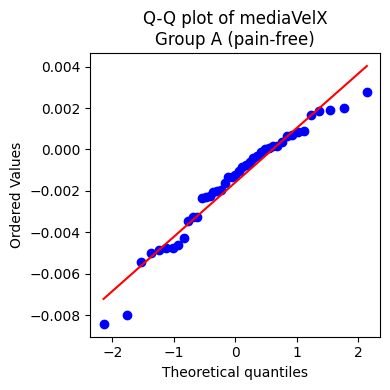

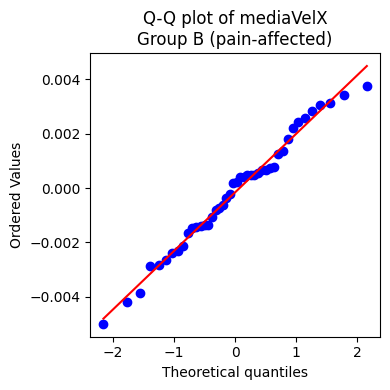

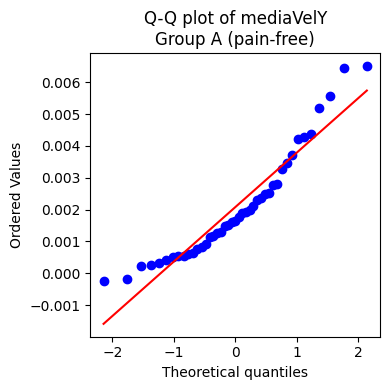

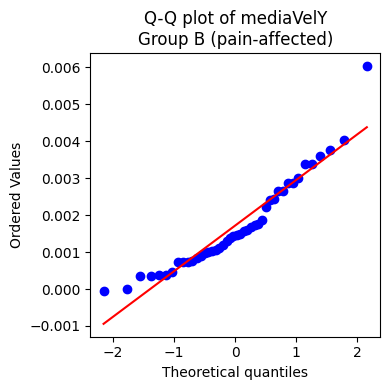

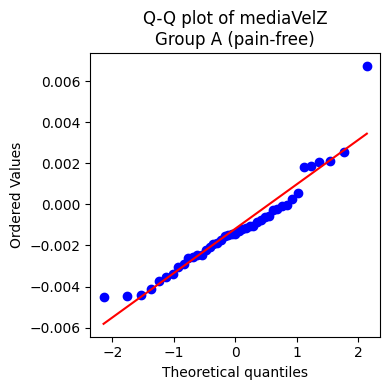

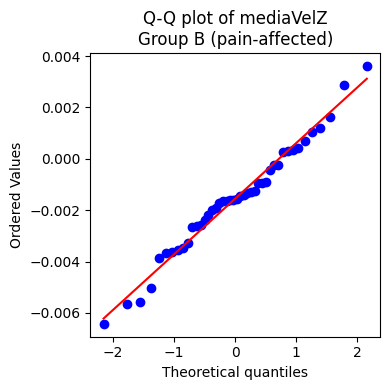

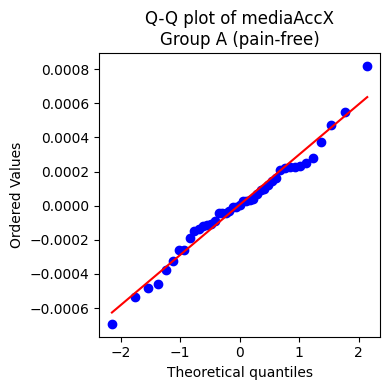

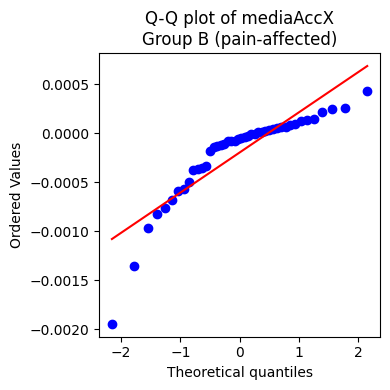

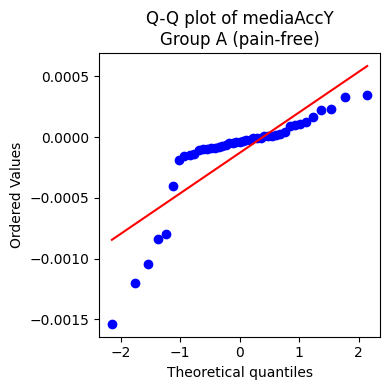

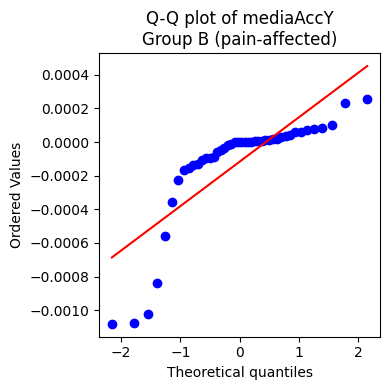

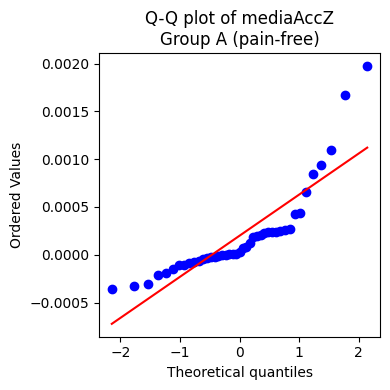

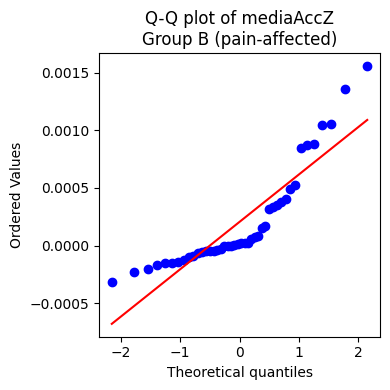

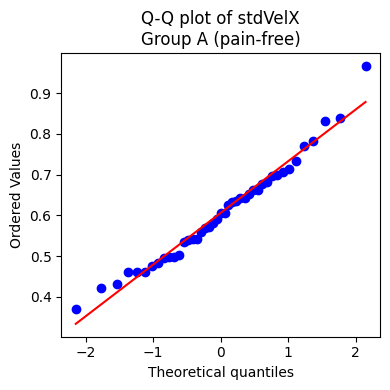

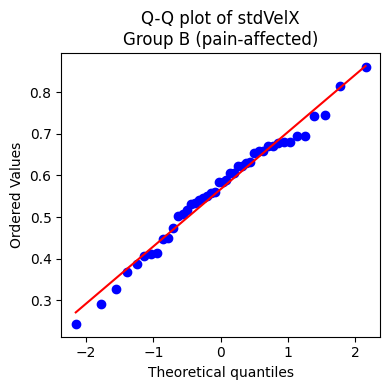

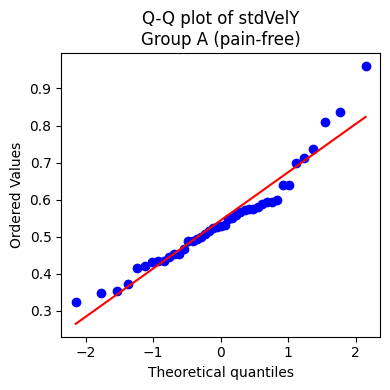

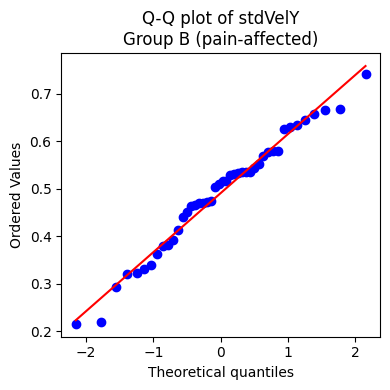

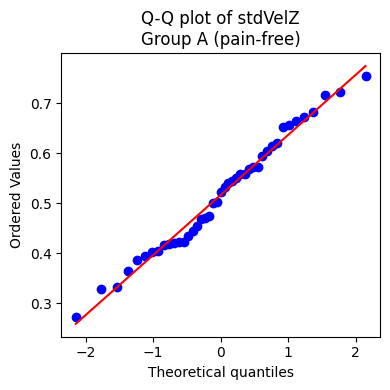

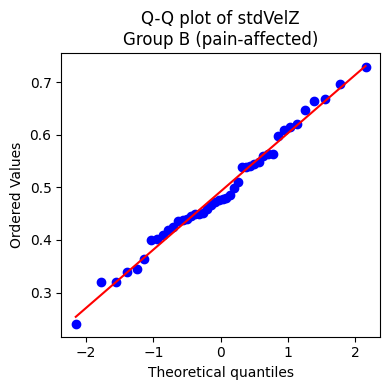

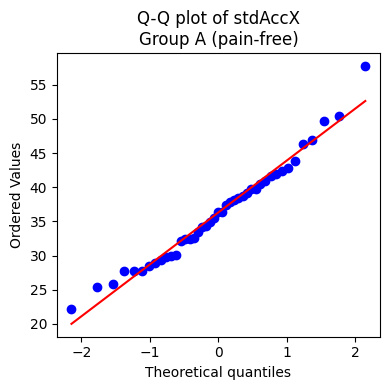

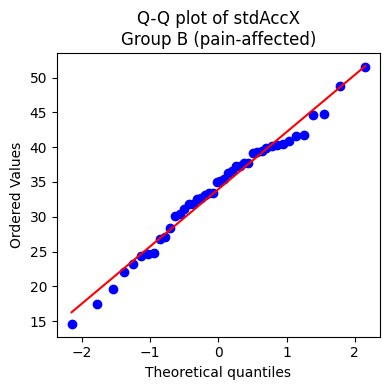

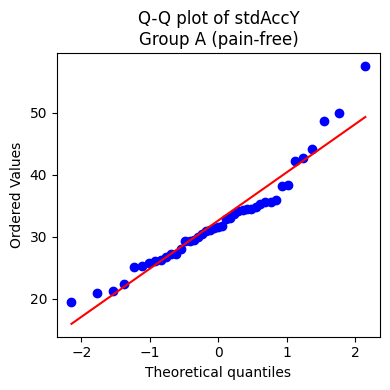

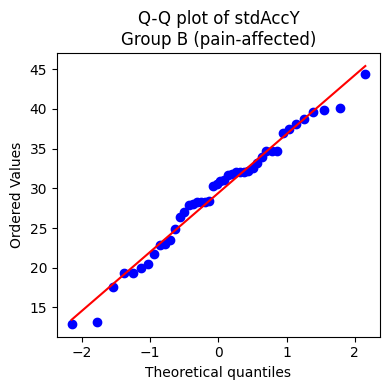

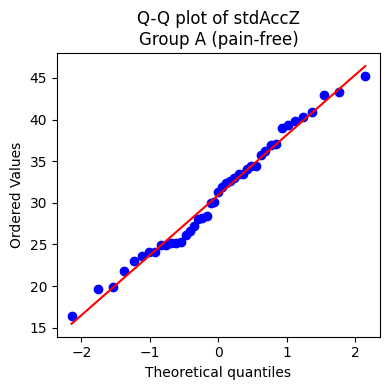

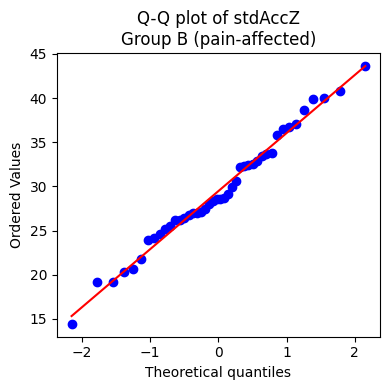

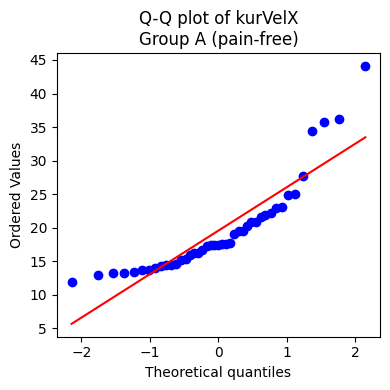

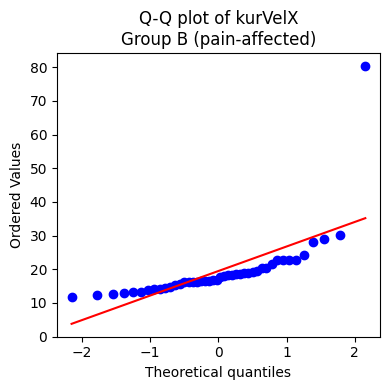

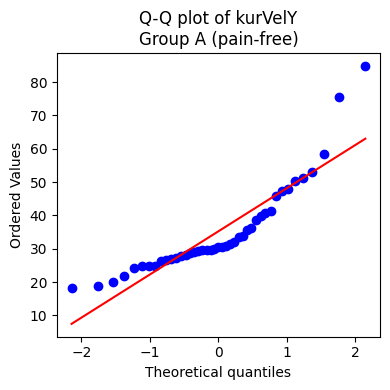

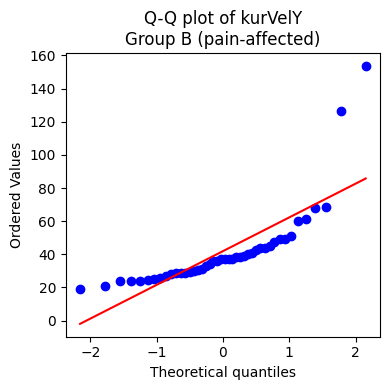

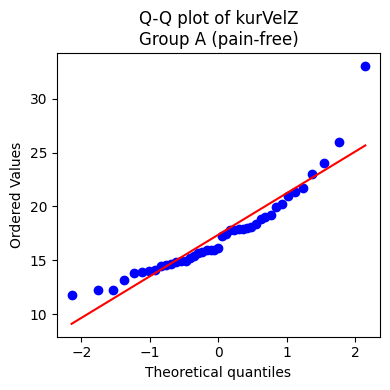

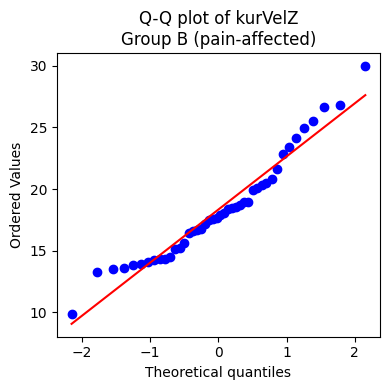

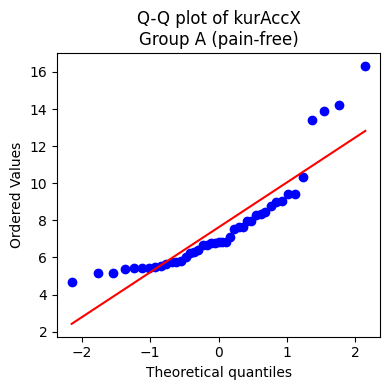

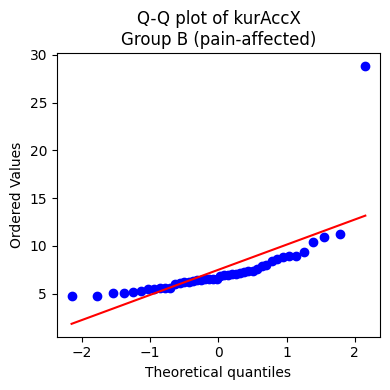

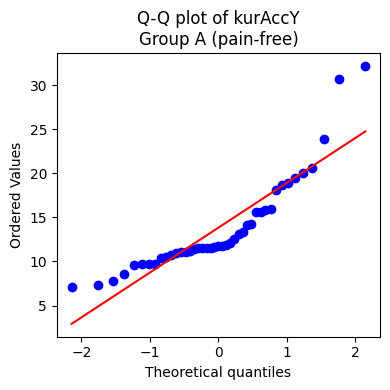

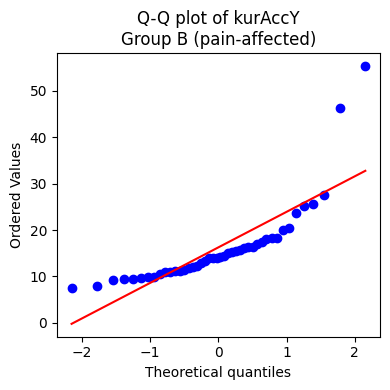

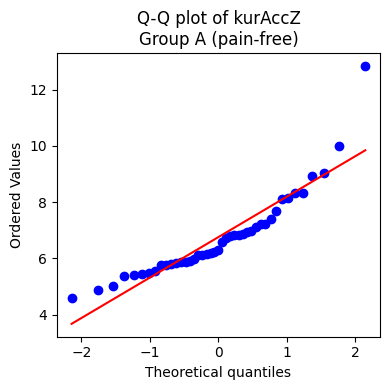

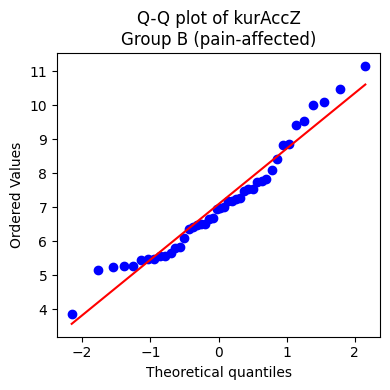

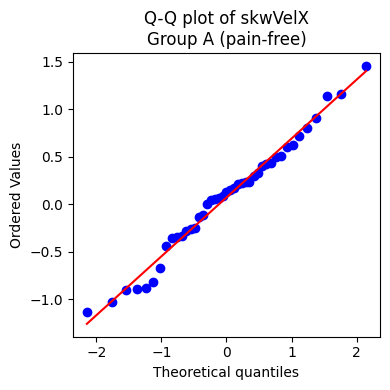

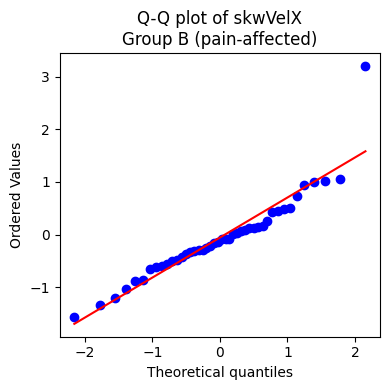

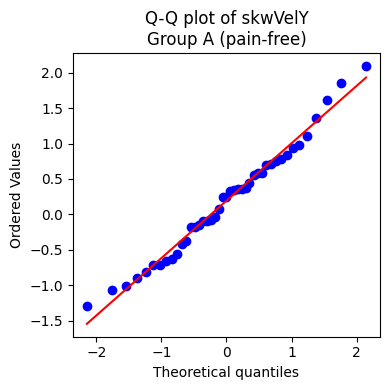

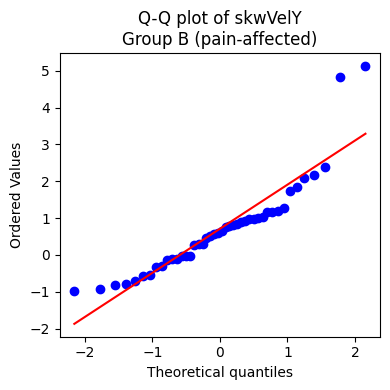

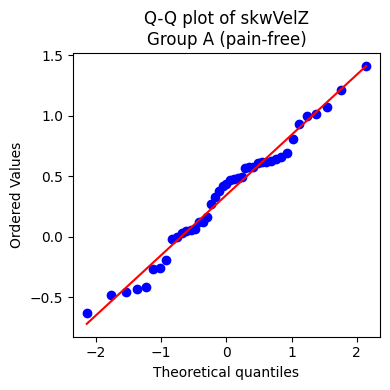

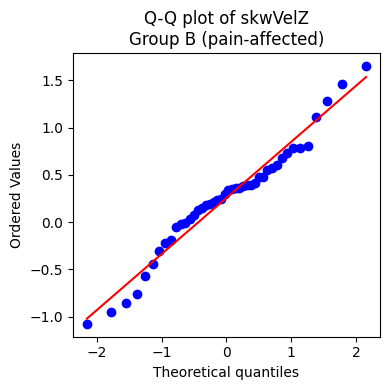

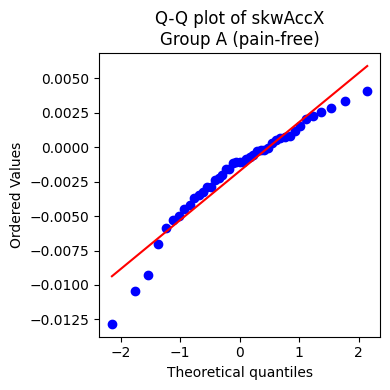

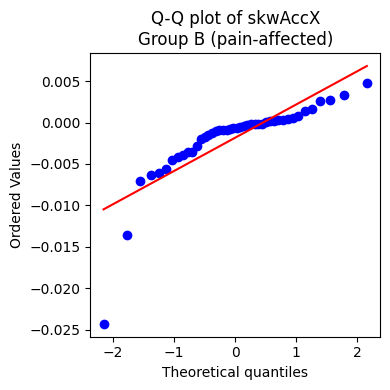

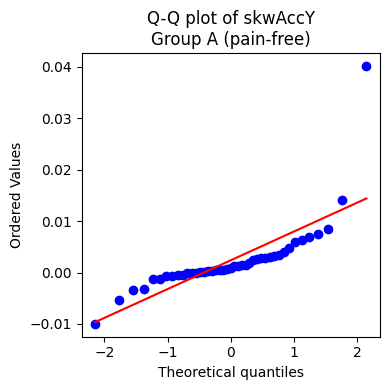

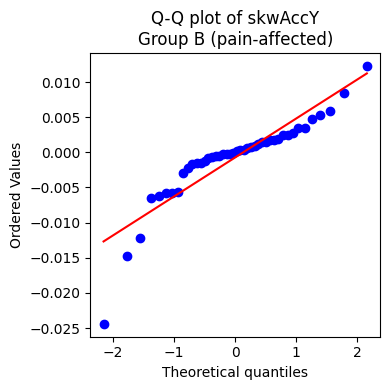

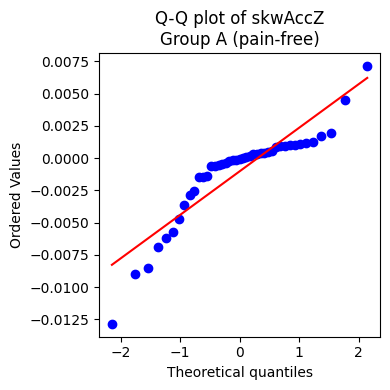

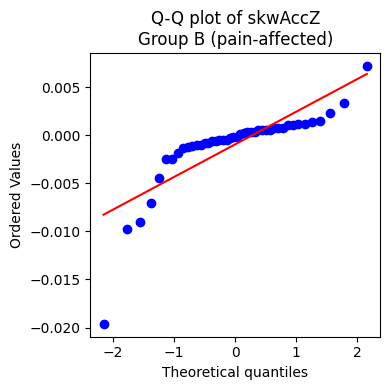

In [8]:
import scipy.stats as stats
import numpy as np

for feat in features:
    for grupo, etiqueta in [(0, "A (pain-free)"), (1, "B (pain-affected)")]:
        datos = patients_features.loc[patients_features["group"] == grupo, feat]
        plt.figure(figsize=(4, 4))
        stats.probplot(datos, dist="norm", plot=plt)
        plt.title(f"Q-Q plot of {feat}\nGroup {etiqueta}")
        plt.tight_layout()
        plt.show()


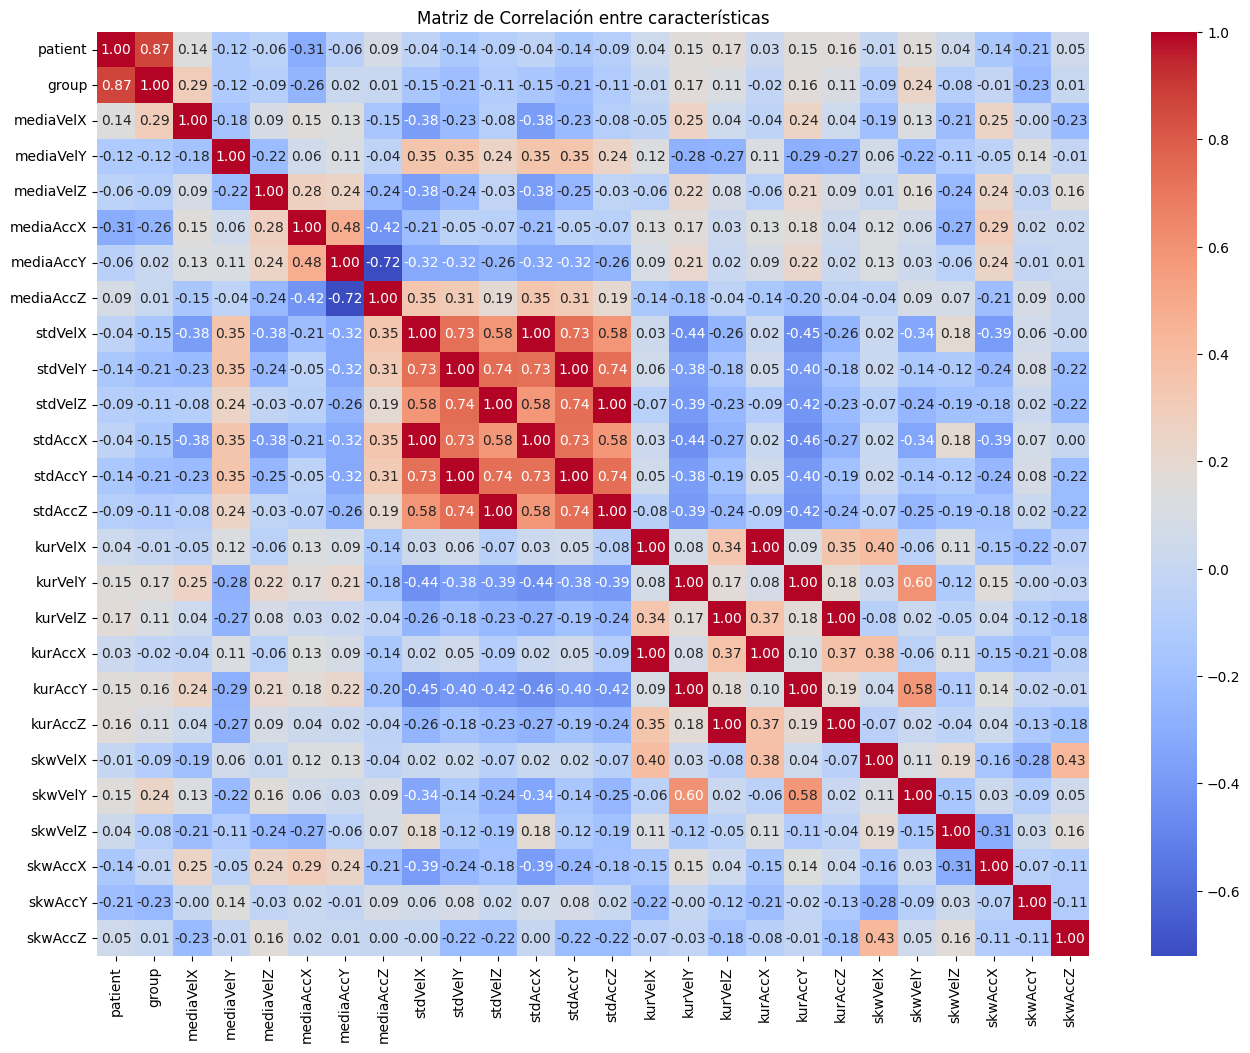

In [ ]:
#EXPLORING CORRELATION

corr_matrix = patients_features.corr()
import seaborn as sns
# Dibujar el heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre características")
plt.show()

Most correlated features:
- KurAcc - KurVel
- StdAcc - StdVel

## Nested Cross-Validation

The same methodology is going to be folllowed to compare the peroformace of the different classification models following a nested cross-validation

In [ ]:
#---------------------------------------------------------------
# FUNCTION THAT RUNS NESTED CV FOR ANY SCIKIT-LEARN PIPELINE
#---------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import scipy.stats as st   # for the 95 % CI

def nested_cv(model_pipeline, param_grid, X, y,
              outer_splits=5, inner_splits=5, random_state=42,
              verbose=True):
    """
    Nested cross-validation with mean ± SD and 95 % CI.
    """
    outer_cv = StratifiedKFold(n_splits=outer_splits,
                               shuffle=True,
                               random_state=random_state)
    inner_cv = StratifiedKFold(n_splits=inner_splits,
                               shuffle=True,
                               random_state=random_state)

    outer_scores, best_params = [], []

    for k, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
        X_train_val, X_test = X.iloc[train_val_idx], X.iloc[test_idx]
        y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]

        gscv = GridSearchCV(
            estimator=model_pipeline,
            param_grid=param_grid,
            cv=inner_cv,
            scoring='accuracy',
            n_jobs=-1,
        )
        gscv.fit(X_train_val, y_train_val)

        # ----- evaluate on outer test -----
        best_model = gscv.best_estimator_
        acc        = accuracy_score(y_test, best_model.predict(X_test))

        outer_scores.append(acc)
        best_params.append(gscv.best_params_)

        if verbose:
            print(f'Fold {k} | test patients = {len(test_idx):2d} | '
                  f'acc = {acc:0.3f} | best = {gscv.best_params_}')

    # ---------- summary ----------
    outer_scores = np.array(outer_scores)
    mean_acc     = outer_scores.mean()
    std_acc      = outer_scores.std(ddof=1)
    n            = len(outer_scores)

    # 95 % CI with Student-t  (positional arg avoids version clash)
    ci_low, ci_high = st.t.interval(
        0.95,                # confidence level
        df=n-1,
        loc=mean_acc,
        scale=std_acc / np.sqrt(n)
    )

    print(f'\nOverall accuracy = {mean_acc:0.3f} ± {std_acc:0.3f}')
    print(f'95 % CI          = [{ci_low:0.3f}, {ci_high:0.3f}]')

    return outer_scores, best_params


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),# missing-value filler for prevention
    ('rf',      RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'rf__n_estimators'     : [100, 150, 200],
    'rf__max_depth'        : [None, 5],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf' : [1, 2, 4],
    'rf__bootstrap'        : [True, False],
}

rf_scores, rf_params = nested_cv(rf_pipe, rf_param_grid, X, y)


Fold 1 | test patients = 18 | acc = 0.389 | best = {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Fold 2 | test patients = 18 | acc = 0.500 | best = {'rf__bootstrap': False, 'rf__max_depth': 5, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 150}
Fold 3 | test patients = 17 | acc = 0.706 | best = {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Fold 4 | test patients = 17 | acc = 0.529 | best = {'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 150}
Fold 5 | test patients = 17 | acc = 0.353 | best = {'rf__bootstrap': False, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 150}

Overall accuracy = 0.495 ± 0.139
95 % CI          = [0.323, 0.668]


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),                   # LR needs scaled features
    ('logistic', LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=5000,
        random_state=42))
])

logreg_param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__class_weight': [None, 'balanced']
}

logreg_scores, logreg_params = nested_cv(
    model_pipeline = logreg_pipe,
    param_grid     = logreg_param_grid,
    X = X,
    y = y
)

Fold 1 | test patients = 18 | acc = 0.500 | best = {'logistic__C': 1, 'logistic__class_weight': None}
Fold 2 | test patients = 18 | acc = 0.556 | best = {'logistic__C': 0.01, 'logistic__class_weight': 'balanced'}
Fold 3 | test patients = 17 | acc = 0.588 | best = {'logistic__C': 1, 'logistic__class_weight': None}
Fold 4 | test patients = 17 | acc = 0.706 | best = {'logistic__C': 1, 'logistic__class_weight': None}
Fold 5 | test patients = 17 | acc = 0.706 | best = {'logistic__C': 0.1, 'logistic__class_weight': None}

Overall accuracy = 0.611 ± 0.092
95 % CI          = [0.497, 0.725]


## Support Vector Machine Classifier (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


svm_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # safety against NaNs
    ('scaler',  StandardScaler()),                  # SVM is scale-sensitive
    ('svc',     SVC(random_state=42))
])


svm_param_grid = [

    # (a) Linear kernel  ─ fast, good baseline
    {'svc__kernel'       : ['linear'],
     'svc__C'            : [0.01, 0.1, 1, 10, 100],
     'svc__class_weight' : [None, 'balanced']},

    # (b) RBF kernel  ─ catches non-linear structure
    {'svc__kernel'       : ['rbf'],
     'svc__C'            : [0.01, 0.1, 1, 10, 100],
     'svc__gamma'        : ['scale', 0.01, 0.1, 1],   # 'scale' = 1 / (n_features·Var)
     'svc__class_weight' : [None, 'balanced']}
]

svm_scores, svm_params = nested_cv(
    model_pipeline = svm_pipe,
    param_grid     = svm_param_grid,
    X = X,
    y = y
)

Fold 1 | test patients = 18 | acc = 0.333 | best = {'svc__C': 0.01, 'svc__class_weight': None, 'svc__kernel': 'linear'}
Fold 2 | test patients = 18 | acc = 0.611 | best = {'svc__C': 1, 'svc__class_weight': None, 'svc__kernel': 'linear'}
Fold 3 | test patients = 17 | acc = 0.588 | best = {'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'linear'}
Fold 4 | test patients = 17 | acc = 0.765 | best = {'svc__C': 0.1, 'svc__class_weight': None, 'svc__kernel': 'linear'}
Fold 5 | test patients = 17 | acc = 0.529 | best = {'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'linear'}

Overall accuracy = 0.565 ± 0.156
95 % CI          = [0.372, 0.759]


## Multilayer Perceptron (MLP) Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


mlp_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
    ('mlp',     MLPClassifier(max_iter=2000,
                              random_state=42))
])

mlp_param_grid = [

    # (a) Solver 'lbfgs'
    {'mlp__solver'             : ['lbfgs'],
     'mlp__hidden_layer_sizes' : [(10,), (20,), (30,), (20, 10)],
     'mlp__activation'         : ['relu', 'tanh'],
     'mlp__alpha'              : [1e-4, 1e-3, 1e-2]},   # L2 regularisation

    # (b) Solver 'adam'  ─ allows early stopping
    {'mlp__solver'             : ['adam'],
     'mlp__hidden_layer_sizes' : [(10,), (20,), (30,), (20, 10)],
     'mlp__activation'         : ['relu', 'tanh'],
     'mlp__alpha'              : [1e-4, 1e-3, 1e-2],
     'mlp__learning_rate_init' : [0.001, 0.01],
     'mlp__early_stopping'     : [True]}
]

mlp_scores, mlp_params = nested_cv(
    model_pipeline = mlp_pipe,
    param_grid     = mlp_param_grid,
    X = X,
    y = y
)

Fold 1 | test patients = 18 | acc = 0.444 | best = {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate_init': 0.001, 'mlp__solver': 'adam'}
Fold 2 | test patients = 18 | acc = 0.611 | best = {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate_init': 0.01, 'mlp__solver': 'adam'}
Fold 3 | test patients = 17 | acc = 0.647 | best = {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate_init': 0.01, 'mlp__solver': 'adam'}
Fold 4 | test patients = 17 | acc = 0.706 | best = {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (20,), 'mlp__learning_rate_init': 0.01, 'mlp__solver': 'adam'}
Fold 5 | test patients = 17 | acc = 0.529 | best = {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_

## Complex Neural Network

In [ ]:
#%% 🧠  NESTED CV WITH PURE KERAS (no SciKeras)

import numpy as np, itertools, tensorflow as tf, scipy.stats as st
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

tf.keras.utils.set_random_seed(42)            # full reproducibility

# ── 1.  DEFINE A MODEL FACTORY ─────────────────────────────────────────────
def build_model(units1=32, units2=16, dropout=0.0, lr=1e-3):
    m = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(units1, activation="relu"),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(units2, activation="relu"),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(1,   activation="sigmoid")
    ])
    m.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return m

# ── 2.  HYPER-PARAMETER GRID (TINY, SO IT FINISHES QUICKLY) ───────────────
param_grid = {
    "units1" : [32, 64],
    "units2" : [16],
    "dropout": [0.0, 0.2],
    "lr"     : [1e-3, 1e-2],
}
grid_list = list(itertools.product(*param_grid.values()))   # 2×1×2×2 = 8 combos

# ── 3.  NESTED CV CONFIG ──────────────────────────────────────────────────
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

outer_scores, best_params = [], []

for outer_k, (train_val_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train_val, X_test = X.iloc[train_val_idx].values, X.iloc[test_idx].values
    y_train_val, y_test = y.iloc[train_val_idx].values, y.iloc[test_idx].values

    # ---- inner loop: hyper-parameter search ----
    best_acc, best_cfg = -np.inf, None
    for cfg in grid_list:
        cfg_dict = dict(zip(param_grid.keys(), cfg))
        inner_accs = []

        for inner_k, (tr_idx, val_idx) in enumerate(inner_cv.split(X_train_val, y_train_val)):
            X_tr, X_val = X_train_val[tr_idx], X_train_val[val_idx]
            y_tr, y_val = y_train_val[tr_idx], y_train_val[val_idx]

            # scaling inside the inner fold
            scaler = StandardScaler().fit(X_tr)
            X_tr  = scaler.transform(X_tr)
            X_val = scaler.transform(X_val)

            model = build_model(**cfg_dict)
            es = tf.keras.callbacks.EarlyStopping(
                    monitor="val_loss", patience=10,
                    restore_best_weights=True, verbose=0)

            model.fit(X_tr, y_tr,
                      epochs=200, batch_size=16,
                      validation_data=(X_val, y_val),
                      callbacks=[es], verbose=0)

            inner_accs.append(model.evaluate(X_val, y_val, verbose=0)[1])

        mean_inner = np.mean(inner_accs)
        if mean_inner > best_acc:
            best_acc, best_cfg = mean_inner, cfg_dict

    best_params.append(best_cfg)

    # ---- retrain on entire outer-training split with best_cfg ----
    scaler = StandardScaler().fit(X_train_val)
    X_train_scaled = scaler.transform(X_train_val)
    X_test_scaled  = scaler.transform(X_test)

    final_model = build_model(**best_cfg)
    es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                          patience=15,
                                          restore_best_weights=True,
                                          verbose=0)
    final_model.fit(
        X_train_scaled, y_train_val,
        epochs=200, batch_size=16,
        validation_split=0.2,
        callbacks=[es], verbose=0)

    acc = final_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    outer_scores.append(acc)

    print(f"Outer fold {outer_k} | acc = {acc:.3f} | best = {best_cfg}")

# ── 4.  SUMMARY STATS ──────────────────────────────────────────────────────
outer_scores = np.array(outer_scores)
mean_acc = outer_scores.mean()
std_acc  = outer_scores.std(ddof=1)
ci_low, ci_high = st.t.interval(0.95, df=len(outer_scores)-1,
                                loc=mean_acc, scale=std_acc/np.sqrt(len(outer_scores)))

print("\nOverall accuracy = "
      f"{mean_acc:.3f} ± {std_acc:.3f}")
print(f"95 % CI          = [{ci_low:.3f}, {ci_high:.3f}]")


Outer fold 1 | acc = 0.278 | best = {'units1': 32, 'units2': 16, 'dropout': 0.0, 'lr': 0.01}
Outer fold 2 | acc = 0.444 | best = {'units1': 32, 'units2': 16, 'dropout': 0.2, 'lr': 0.01}
Outer fold 3 | acc = 0.471 | best = {'units1': 32, 'units2': 16, 'dropout': 0.0, 'lr': 0.01}
Outer fold 4 | acc = 0.471 | best = {'units1': 32, 'units2': 16, 'dropout': 0.2, 'lr': 0.01}
Outer fold 5 | acc = 0.588 | best = {'units1': 64, 'units2': 16, 'dropout': 0.0, 'lr': 0.001}

Overall accuracy = 0.450 ± 0.111
95 % CI          = [0.312, 0.589]
